# Preliminary results 

Note in the formulas below we will use $\sigma$ instead of $\rho$ to not create confusion between $p$ and $\rho$. 
Therefore we have that: $\sigma = \frac{\Lambda}{\mu_1 + \mu_2} \iff \Lambda = (\mu_1 + \mu_2) \sigma = 11 \, \sigma$

Let's now find the mean response time independently of the job dispatching policy:


$$
\begin{align}
E[R] &= pE[R_1] + (1-p)E[R_2] \\
&= p\, \big(1 + \frac{11 \sigma \, p E[L^2]}{2(1 - 11 \sigma \, p )}\big) + (1- p) \big(\frac{1}{10} + \frac{(11 \sigma - 11 \sigma \, p) E[L^2]}{20[10 - (11 \sigma - 11 \sigma \, p)]}  \big) \quad \quad (*)
\end{align}
$$
    where $E[L^2] = 1 + \frac{1}{\alpha^2 - 2\alpha}$

Moreover independently from which job dispatching policy we will choose we know that these two conditions must be satisfied, namely that the rate at which jobs arrive at a single server doesn't overcome the capacity of that server to execute jobs: 


$$
(\#) \, \,  
\begin{cases}
p\Lambda < \mu_1 \iff p < \frac{\mu_1}{\Lambda} = \frac{1}{11 \sigma} \\
(1 - p) \Lambda < \mu_2 \iff p > \frac{\Lambda - \mu_2}{\Lambda} = \frac{11 \sigma - 10}{11 \sigma}\\
\end{cases}
$$

Let's now see how this formulas behave for the different policies. 

## SITA policy 

For this policy we will  have that $p:= P(L < \theta)$ and this value can b derived in the following way: 

$$
\begin{align}
p = P(L < \theta) &= 1 - P(L > \theta) \\
&= 1 - \big(\frac{b}{\alpha}\big)^\alpha \quad \text{for} \, \, \, \theta \geq b
\end{align}
$$
Using the fact that $E[L] = \frac{\alpha b}{\alpha - 1} = 1$ we find that $b = \frac{\alpha - 1}{\alpha}$, therefore: 
$$
p = 1 - \big( \frac{\alpha - 1}{\alpha \theta} \big)^\alpha \quad \text{for} \, \, \, \theta \geq \frac{\alpha - 1}{\alpha}
$$

Now we just insert the formulas we have found for the SITA policy in the general equation $(*)$: 



$$
\begin{align}
E[R] &= \big[1 -  \big( \frac{\alpha - 1}{\alpha \theta}\big)^\alpha\big] \big(1 + \frac{11 \sigma \big[1 -  \big( \frac{\alpha - 1}{\alpha \theta}\big)^\alpha\big] E[L^2]}{2(1 - 11 \sigma \, \big[1 -  \big( \frac{\alpha - 1}{\alpha \theta}\big)^\alpha\big])} \big) + \big(\frac{\alpha - 1}{\alpha \theta} \big)^\alpha \big(\frac{1}{10} + \frac{11 \sigma \big(\frac{\alpha - 1}{\alpha \theta} \big)^\alpha E[L^2]}{20 \, [10 - \big[11 \sigma \big(\frac{\alpha - 1}{\alpha \theta} \big)^\alpha \big]} \big)
\end{align}
$$

where $E[L^2] = \frac{\alpha b^2}{\alpha - 2} = \frac{b (\alpha - 1)}{\alpha - 2} \, \, \frac{\alpha b}{\alpha - 1} \overset{E[L] = 1}{=} \frac{\alpha - 1}{\alpha - 2} \, \, \frac{\alpha -1 }{\alpha} = \frac{( \alpha - 1)^2}{\alpha^2 - 2 \alpha} = 1 + \frac{1}{\alpha^2 - 2 \alpha}$ 

Now we want to find the conditions $(\#)$ in the case of the SITA policy:


$$
\begin{cases}
p < \frac{1}{11 \sigma} \iff 1 - \big(\frac{\alpha - 1}{\alpha \theta} \big)^\alpha < \frac{1}{11 \sigma} \iff \theta < \frac{\alpha - 1}{\alpha \big( 1 - \frac{1}{11 \sigma} \big)^{\frac{1}{\alpha}}} \\
p > \frac{11 \sigma - 10}{11 \sigma} \iff 1 - \big(\frac{\alpha - 1}{\alpha \theta} \big)^\alpha > \frac{11 \sigma - 10}{11 \sigma} \iff \theta > \frac{\alpha - 1}{\alpha \big(1 - \frac{11 \sigma - 10}{11 \sigma} \big)^{\frac{1}{\alpha}}}\\
\end{cases}
$$

Therefore we will search the minimum of $E[R]$ in the interval $\big(\max\{0, \frac{\alpha - 1}{\alpha \big(1 - \frac{11 \sigma - 10}{11 \sigma} \big)^{\frac{1}{\alpha}}}\};  \min\{\frac{\alpha - 1}{\alpha}, \frac{\alpha - 1}{\alpha \big( 1 - \frac{1}{11 \sigma} \big)^{\frac{1}{\alpha}}}\}\big)$

## Random policy 

For this policy the value $p$ is given, therefore we won't need to make big changes from formula $(*)$: 

$$
\begin{align}
E[R] = p\, \big(1 + \frac{11 \sigma \, p E[L^2]}{2(1 - 11 \sigma \, p )}\big) + (1- p) \big(\frac{1}{10} + \frac{(11 \sigma - 11 \sigma \, p) E[L^2]}{20[10 - (11 \sigma - 11 \sigma \, p)]}  \big) 
\end{align}
$$
    where $E[L^2] = 1 + \frac{1}{\alpha^2 - 2\alpha}$

Same for the conditions $(\#)$ that will remain: 

$$
\begin{cases}
p <   \frac{1}{11 \sigma} \\
p > \frac{11 \sigma - 10}{11 \sigma}\\
\end{cases}
$$

Therefore we will search the minimum of the function $E[R]$ in the interval $\big(\max\{0, \frac{11 \sigma - 10}{11 \sigma}\};  \min\{1, \frac{1}{11 \sigma} \}\big)$  

# Implementation 

In [23]:
from scipy.optimize import fminbound
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
def general_mean_time (p, alpha, rho): 
    second_moment = 1 + 1/(alpha**2 - 2*alpha)
    mean_time =  p*(1 + (11*rho*p*second_moment) / (2* (1 - 11*rho*p) )) + \
                (1 - p)*(1/10 + (11*rho - 11*rho*p)*second_moment) / (20*(10 - (11*rho - 11*rho*p)))
    return mean_time 

## Plots for job dispatching parameters  

Plots of $\theta^*$ as a function of $\rho$ for the three considered values of $\alpha$. 

### SITA

In [3]:
def SITA_intervals (alpha, rho):   
    low_bound = max(0, (alpha - 1)/( alpha*(1 - (11*rho - 10)/(11*rho) )**(1/alpha) ) )
    up_bound = min( (alpha - 1)/alpha, (alpha - 1)/( alpha*(1 - 1/(11*rho)**(1/alpha) ) ) )   
    return low_bound, up_bound    

In [33]:
def sita_policy():    
    list_theta_images_alpha = [0]*3
    theta_image = {0.5: 0, 0.6: 0, 0.7: 0, 0.8: 0, 0.9: 0}
    alpha = [2.01,2.05,2.25]
    
    for rho in theta_image.keys():
        SITA_mean_time = lambda theta, alpha = alpha[0], rho = rho: general_mean_time(1 - ((alpha - 1)/(alpha*theta))**alpha, 
                                                         alpha, 
                                                         rho)
        theta_image[rho] = fminbound(func = SITA_mean_time, 
                                     x1 = SITA_intervals(alpha[0], rho)[0], 
                                     x2 = SITA_intervals(alpha[0], rho)[1],
                                     xtol = 1e-08)
    list_theta_images_alpha[0] = theta_image.copy()    

    for rho in theta_image.keys():
        SITA_mean_time = lambda theta, alpha = alpha[1], rho = rho: general_mean_time(1 - ((alpha - 1)/(alpha*theta))**alpha, 
                                                         alpha, 
                                                         rho)
        theta_image[rho] = fminbound(func = SITA_mean_time, 
                                     x1 = SITA_intervals(alpha[1], rho)[0], 
                                     x2 = SITA_intervals(alpha[1], rho)[1],
                                     xtol = 1e-08)    

    list_theta_images_alpha[1] = theta_image.copy()    

    for rho in theta_image.keys():
        SITA_mean_time = lambda theta, alpha = alpha[2], rho = rho: general_mean_time(1 - ((alpha - 1)/(alpha*theta))**alpha, 
                                                         alpha, 
                                                         rho)
        theta_image[rho] = fminbound(func = SITA_mean_time, 
                                     x1 = SITA_intervals(alpha[2], rho)[0], 
                                     x2 = SITA_intervals(alpha[2], rho)[1],
                                     xtol = 1e-08)

    list_theta_images_alpha[2] = theta_image.copy()
    
    return list_theta_images_alpha

In [34]:
list_theta_images_alpha = sita_policy()
for value in list_theta_images_alpha:
    print(value)

{0.5: 0.5024875458840924, 0.6: 0.5024875449228811, 0.7: 0.5024875495399264, 0.8: 0.5024875407512033, 0.9: 0.5024875426312994}
{0.5: 0.5121951102206872, 0.6: 0.5121951016774703, 0.7: 0.5121951078909515, 0.8: 0.5121951001590115, 0.9: 0.5121951024014725}
{0.5: 0.5476485555189443, 0.6: 0.5555555362206576, 0.7: 0.5555555367286853, 0.8: 0.5555555326870703, 0.9: 0.5555555362236019}


In [24]:
#saving the dicts separately
theta0 = list_theta_images_alpha[0]
theta1 = list_theta_images_alpha[1]
theta2 = list_theta_images_alpha[2]

#setting the x values and the y values
x = list(theta0.keys())          
t0 = list(theta0.values())
t1 = list(theta1.values())
t2 = list(theta2.values())

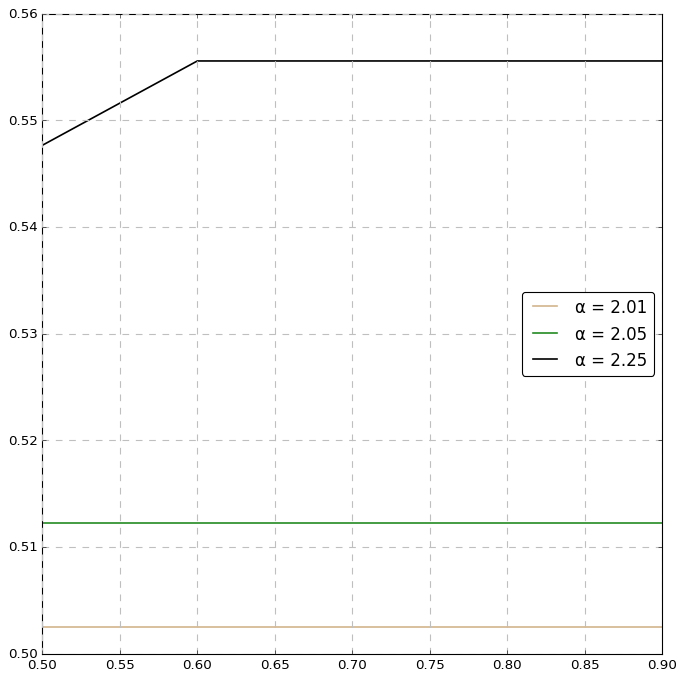

In [27]:
plt.figure(facecolor='white', edgecolor='black')
plt.rc('figure', figsize = (10, 10))

ax = plt.axes()
plt.grid(True, lw = 1, ls = '--', c = '.75')

plt.plot(x, t0, linewidth = 1.5,
         color = 'tan',
         label = 'α = 2.01')

plt.plot(x, t1, linewidth = 1.5,
         color = 'forestgreen',
         label = 'α = 2.05')

plt.plot(x, t2, linewidth = 1.5,
         color = 'k',
         label = 'α = 2.25')


plt.legend(prop={'size': 15}, fancybox = True,loc = 'center right')
plt.show();

### Random

Plots of $p^*$ as a function of $\rho$ for the three considered values of $\alpha$. 

In [6]:
def Random_intervals (alpha, rho):
    low_bound = max(0, (11*rho - 10)/(11*rho) )
    up_bound = min(1, 1/(11*rho))    
    return low_bound, up_bound

In [37]:
def random_policy():    
    list_p_images_alpha = [0]*3
    p_image = {0.5: 0, 0.6: 0, 0.7: 0, 0.8: 0, 0.9: 0}
    alpha = [2.01,2.05,2.25]
    
    for rho in p_image.keys():
        random_mean_time = lambda p, alpha = alpha[0], rho = rho: general_mean_time(p, 
                                                         alpha, 
                                                         rho)
        p_image[rho] = fminbound(func = random_mean_time, 
                                     x1 = Random_intervals(alpha[0], rho)[0], 
                                     x2 = Random_intervals(alpha[0], rho)[1],
                                     xtol = 1e-08)


    list_p_images_alpha[0] = p_image.copy()    

    for rho in p_image.keys():
        random_mean_time = lambda p, alpha = alpha[1], rho = rho: general_mean_time(p, 
                                                         alpha, 
                                                         rho)
        p_image[rho] = fminbound(func = random_mean_time, 
                                     x1 = Random_intervals(alpha[1], rho)[0], 
                                     x2 = Random_intervals(alpha[1], rho)[1],
                                     xtol = 1e-08)    



    list_p_images_alpha[1] = p_image.copy()    

    for rho in p_image.keys():
        random_mean_time = lambda p, alpha = alpha[2], rho = rho: general_mean_time(p, 
                                                         alpha, 
                                                         rho)

        p_image[rho] = fminbound(func = random_mean_time, 
                                     x1 = Random_intervals(alpha[2], rho)[0], 
                                     x2 = Random_intervals(alpha[2], rho)[1],
                                     xtol = 1e-08)

    list_p_images_alpha[2] = p_image.copy()
    return list_p_images_alpha

In [39]:
list_p_images_alpha = random_policy()
list_p_images_alpha

[{0.5: 0.023971692755814775,
  0.6: 0.03268113900776976,
  0.7: 0.044155734729152456,
  0.8: 0.058575305609219454,
  0.9: 0.07491261303437861},
 {0.5: 0.015180808240140108,
  0.6: 0.02756358470853077,
  0.7: 0.0417244453492077,
  0.8: 0.057803472500250086,
  0.9: 0.07482027869029449},
 {0.5: 6.549037692341643e-09,
  0.6: 0.0028459806671165735,
  0.7: 0.03126490710331191,
  0.8: 0.05477608653318401,
  0.9: 0.07447813838752694}]

In [40]:
#saving the dicts separately
p0 = list_p_images_alpha[0]
p1 = list_p_images_alpha[1]
p2 = list_p_images_alpha[2]

#setting the x values and the y values
x = list(p0.keys())          
y0 = list(p0.values())
y1 = list(p1.values())
y2 = list(p2.values())

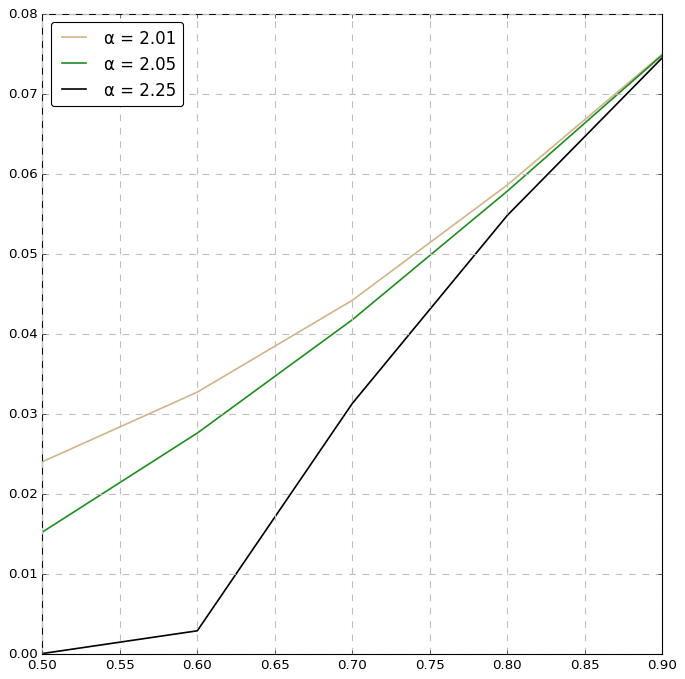

In [41]:
plt.figure(facecolor='white', edgecolor='black')
plt.rc('figure', figsize = (10, 10))

ax = plt.axes()
plt.grid(True, lw = 1, ls = '--', c = '.75')

plt.plot(x, y0, linewidth = 1.5,
         color = 'tan',
         label = 'α = 2.01')

plt.plot(x, y1, linewidth = 1.5,
         color = 'forestgreen',
         label = 'α = 2.05')

plt.plot(x, y2, linewidth = 1.5,
         color = 'k',
         label = 'α = 2.25')


plt.legend(prop={'size': 15}, fancybox = True,loc = 'upper left')
plt.show();

## Plots for job dispatching parameters  

With $\theta = \theta^*$ plot $E[D]$ as a function of $\rho$

In [67]:
alpha = [2.01,2.05,2.25]
rho = [0.5,0.6,0.7,0.8,0.9]
theta_s = 0.5024875458840924
tmp = [0]*3
SITA_mean_time = []
for r in rho:
    for a in alpha:
        SITA_mean_time.append(general_mean_time(1-((a-1)/(a*theta_s))**a, a, r))

In [68]:
SITA_mean_time

[3.1025765955828417,
 0.7475244439683824,
 0.3399332663342609,
 4.927327803532277,
 1.2308429490690302,
 0.8042859530199055,
 8.497493705339746,
 2.261848933911924,
 4.8188556378548695,
 18.61296731791522,
 6.058985773555872,
 -1.8802653580557556,
 251.27031185777594,
 -19.448114547523005,
 -0.901075741437727]

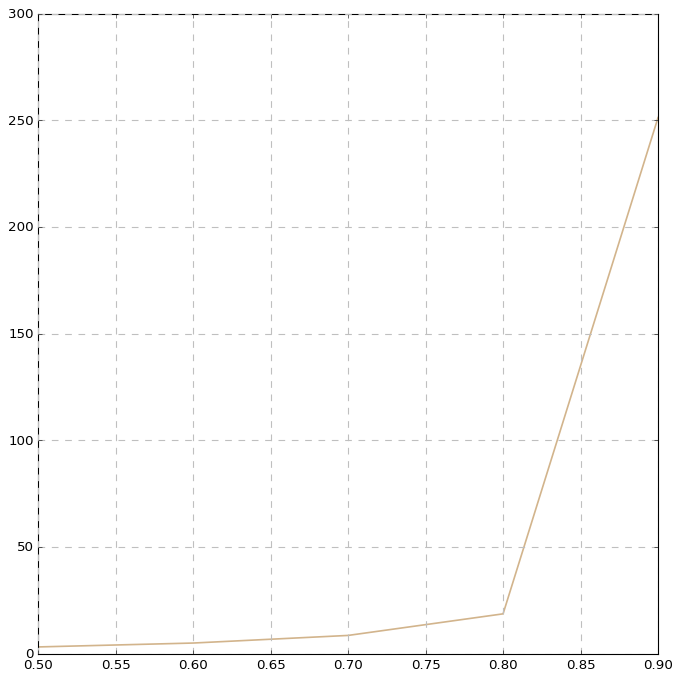

In [50]:
plt.figure(facecolor='white', edgecolor='black')
plt.rc('figure', figsize = (10, 10))

ax = plt.axes()
plt.grid(True, lw = 1, ls = '--', c = '.75')

plt.plot(rho,SITA_mean_time, linewidth = 1.5,
         color = 'tan')
plt.show();

With $p = p^*$ plot $E[D]$ as a function of $\rho$